<a href="https://colab.research.google.com/github/ozturkcemal/SupplyChainAnalytics/blob/main/03_FacilityLocation_CenterOfGravity/BestCitySelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Haversine Formula

The Haversine formula is used to calculate the distance between two points on the Earth's surface given their latitude and longitude.

$
d = 2r \times \arcsin\left(\sqrt{\sin^2\left(\frac{\Delta\phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta\lambda}{2}\right)}\right)
$

Where:

- $\phi_1$ and $\phi_2$ are the latitudes of the two points in radians.
- $\lambda_1$ and $\lambda_2$ are the longitudes of the two points in radians.
- $\Delta\phi = \phi_2 - \phi_1$ is the difference in latitudes.
- $\Delta\lambda = \lambda_2 - \lambda_1$ is the difference in longitudes.
- $r$ is the Earth’s radius (mean radius = 6,371 kilometers).

In [3]:

# Haversine function to compute the distance in kilometers
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers
    r = 6371  # kilometers
    return c * r

In [4]:
# Data from the table
data = {
    'City #': list(range(1, 26)),  # Create City # from 1 to 25
    'Latitude': [-16.6, -16.7, -16.8, -17, -17, -17.2, -17.5, -17.4, -17.5, -17.8, -17.9, -18, -18.4, -18.9, -19.3,
                 -19.4, -19.4, -19.9, -20.3, -21.2, -21.6, -22.6, -23.4, -24, -24.9],
    'Longitude': [154.8, 156.8, 153.2, 154, 152, 144.9, 155.7, 147.1, 141.1, 155.1, 153.8, 144.6, 142.4, 156.8, 148.3,
                  152.9, 142.8, 143.7, 152.5, 143.7, 155.6, 140.1, 155.8, 144.4, 146.4],
    'Population': [1655000, 2300000, 601000, 1385000, 1230000, 665000, 664000, 885000, 1116000, 636000, 1200000, 148000,
                   854000, 1473000, 615000, 1145000, 627000, 542000, 379000, 964000, 546000, 706000, 727000, 669000, 931000],
    'Distance_to_Capital': [0] * 25  # Assign default value of 0 for Distance_to_Capital
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

Center of Gravity Latitude:


${Center\_Gravity\_Latitude} = \frac{\sum{c \in C} ({Population} \times {Latitude})}{{Total Population}}$


Center of Gravity Longitude:


${Center\_Gravity\_Longitude} = \frac{\sum{c \in C} ({Population} \times {Longitude})}{{Total Population}}$


${Weighted\_Average\_Distance} = \frac{\sum{c \in C} ({Population} \times {Distance\_to\_Capital})}{{Total Population}}$


In [5]:
total_population = df['Population'].sum()  # Total population

# Variables to track the best city as the capital candidate
best_city = None
best_weighted_distance = float('inf')  # Set initial value to a large number
best_percent_cities_within_500km = 0
best_city_latitude = None
best_city_longitude = None

# Loop over each city to test it as the capital
for index, row in df.iterrows():
    Capital_Latitude = row['Latitude']
    Capital_Longitude = row['Longitude']

    # Compute the distance to the capital for each city using the Haversine formula
    df['Distance_to_Capital'] = df.apply(
        lambda city_row: haversine(city_row['Latitude'], city_row['Longitude'], Capital_Latitude, Capital_Longitude), axis=1)

    # Compute the Weighted_Average_Distance
    weighted_distance_sum = (df['Population'] * df['Distance_to_Capital']).sum()  # Sum of (Population * distance)
    Weighted_Average_Distance = weighted_distance_sum / total_population

    # Calculate the percentage of cities within 500 km
    cities_within_500km = df[df['Distance_to_Capital'] <= 500].shape[0]
    percent_cities_within_500km = (cities_within_500km / df.shape[0]) * 100

    # Check if this city is the best candidate based on weighted average distance
    if Weighted_Average_Distance < best_weighted_distance:
        best_city = row['City #']
        best_weighted_distance = Weighted_Average_Distance
        best_percent_cities_within_500km = percent_cities_within_500km
        best_city_latitude = row['Latitude']
        best_city_longitude = row['Longitude']

    # Output the results for this candidate city
    print(f"City {row['City #']} as Capital:")
    print(f"Weighted Average Distance to Capital: {Weighted_Average_Distance:.2f} km")
    print(f"Percentage of Cities within 500 km of the Capital: {percent_cities_within_500km:.2f}%\n")

# Assign Capital_Latitude and Capital_Longitude to the best city's latitude and longitude
Capital_Latitude = best_city_latitude
Capital_Longitude = best_city_longitude

# Output the best city as the capital
print(f"\nBest City as Capital: City {best_city}")
print(f"Best Weighted Average Distance: {best_weighted_distance:.2f} km")
print(f"Percentage of Cities within 500 km of the Best Capital: {best_percent_cities_within_500km:.2f}%")
print(f"Assigned Capital Latitude: {Capital_Latitude}")
print(f"Assigned Capital Longitude: {Capital_Longitude}")

City 1.0 as Capital:
Weighted Average Distance to Capital: 629.04 km
Percentage of Cities within 500 km of the Capital: 44.00%

City 2.0 as Capital:
Weighted Average Distance to Capital: 741.27 km
Percentage of Cities within 500 km of the Capital: 32.00%

City 3.0 as Capital:
Weighted Average Distance to Capital: 590.02 km
Percentage of Cities within 500 km of the Capital: 44.00%

City 4.0 as Capital:
Weighted Average Distance to Capital: 589.40 km
Percentage of Cities within 500 km of the Capital: 44.00%

City 5.0 as Capital:
Weighted Average Distance to Capital: 588.52 km
Percentage of Cities within 500 km of the Capital: 40.00%

City 6.0 as Capital:
Weighted Average Distance to Capital: 828.61 km
Percentage of Cities within 500 km of the Capital: 36.00%

City 7.0 as Capital:
Weighted Average Distance to Capital: 648.95 km
Percentage of Cities within 500 km of the Capital: 48.00%

City 8.0 as Capital:
Weighted Average Distance to Capital: 716.32 km
Percentage of Cities within 500 km 

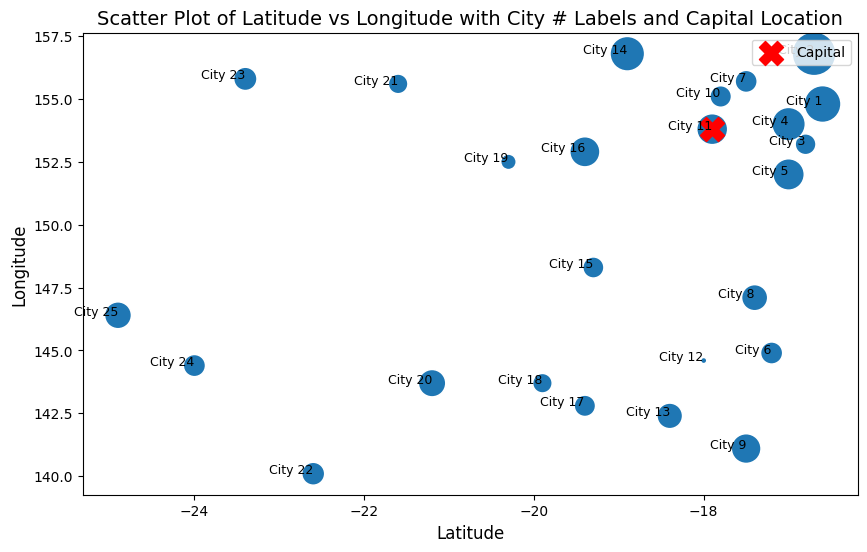

    City #  Latitude  Longitude  Population  Distance_to_Capital
0        1     -16.6      154.8     1655000          1269.886469
1        2     -16.7      156.8     2300000          1413.079679
2        3     -16.8      153.2      601000          1144.225716
3        4     -17.0      154.0     1385000          1180.245138
4        5     -17.0      152.0     1230000          1053.102117
5        6     -17.2      144.9      665000           870.205594
6        7     -17.5      155.7      664000          1266.675756
7        8     -17.4      147.1      885000           837.108956
8        9     -17.5      141.1     1116000           989.103888
9       10     -17.8      155.1      636000          1197.236487
10      11     -17.9      153.8     1200000          1091.605737
11      12     -18.0      144.6      148000           789.497469
12      13     -18.4      142.4      854000           832.474860
13      14     -18.9      156.8     1473000          1262.689970
14      15     -19.3     

In [6]:
# Initialize the plot
plt.figure(figsize=(10, 6))

# Create the scatter plot using seaborn for cities
sns.scatterplot(x='Latitude', y='Longitude', size='Population', data=df, sizes=(20, 1000), legend=False)

# Plot the capital location with a distinct marker and label it
plt.scatter(Capital_Latitude, Capital_Longitude, color='red', s=300, marker='X', label='Capital')

# Add labels to each point for City #
for i in range(df.shape[0]):
    plt.text(df['Latitude'][i], df['Longitude'][i], f"City {df['City #'][i]}", fontsize=9, ha='right')

# Add labels and title
plt.title("Scatter Plot of Latitude vs Longitude with City # Labels and Capital Location", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)

# Add legend, forcing the label to be displayed
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Print the DataFrame to see the updated Distance_to_Capital column
print(df)

In [7]:
# Export the DataFrame to a CSV file
output_file = 'city_data_with_distances.csv'
df.to_csv(output_file, index=False)

print(f"DataFrame exported to {output_file}")

DataFrame exported to city_data_with_distances.csv
